In [33]:
import pandas as pd 
import numpy as np

albums = pd.read_csv("data/spotify_spotify_albums.csv", index_col=0) 
artists = pd.read_csv("data/spotify_spotify_artists.csv", index_col=0) 
tracks = pd.read_csv("data/spotify_spotify_tracks.csv",index_col=0)

#### Profiling Data

In [34]:
albums.head() # We see first 5 rows across all columns. This looks to be a wide dataset with many columns containing categorical variables.
# Notice the first column: 'Unnamed: 0'. This is an index column that wasn't read correctly before we re-ran the previous block with 'index_col = 0'. 
# If we preferred not to re-read a large file like this, we could have typed:
  # albums.drop("Unnamed: 0", axis=1, inplace=True)
# Or:
  # albums = albums.iloc[:,1:] 

albums.tail() # Shows last 5 rows and lets us determine number of rows in dataframe (75511)
albums.shape # Gives dimensionality of dataframe

albums.loc[10:20,['name', 'release_date']]

,name,release_date
10,Beethoven: 6 Bagatelles & Piano Sonatas Nos. 3...,2019-03-01
11,Au Long de la Loire,2019-03-01
12,I Still Miss U,2019-03-15
13,Kolmekymppinen,1980
14,Bruja,2018-04-24
15,Sonatas for two violins,2019-03-01
16,Sirènes,2019-03-01
17,Light of Day,2019-03-01
18,Madame del Campo,2015-08-03
19,Beethoven: Piano Concerto No. 2 & Triple Conce...,2019-03-01


In [35]:
print(artists.shape)
artists.head() # This has two quantitative variable columns in 'artist_popularity' and 'followers'.
artists.tail()


(56129, 8)


,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type
56124,23,1212,['chilean rock'],48YkQQTWzmT248VY8DF7Fv,Profetas y Freneticos,29WK73lMQpLELfHd6PfbjY,track_20,artist
56125,42,57973,"['aggro chileno', 'andean', 'chilean rock', 'l...",1OgaghfYd1qr8DFoNrfDNk,Sinergia,0rXhmIYRPIoVYstJdZt4uq,track_21,artist
56126,38,20870,"['australian alternative rock', 'australian ro...",7o9kdTx6RmO12iAVVsNehd,The Superjesus,1B7tV3WzEnDUS7wXSKDXk3,track_1,artist
56127,44,33923,"['australian alternative rock', 'australian ro...",6n3YUZcayLRuAunJUUelvz,Regurgitator,4e5wI6VC4eVDTtpyZ409Pw,track_8,artist
56128,44,42026,"['australian alternative rock', 'australian in...",47yawJswuSfSvizYhItoOP,Something For Kate,1bOjAQHYtPIsZfPAc1Qq61,track_9,artist


In [36]:
print(tracks.shape) # Logically, there are more tracks than albums, and there are more albums than artists
tracks.head() # Another wide dataset with many quantitative variables. Joining with the other two sets could allow for interesting statistical analysis.
tracks.tail()

(101939, 31)


,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,energy,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
101934,0.005640,1M9n4vCmOH4lbcHrpt21Qy,https://api.spotify.com/v1/audio-analysis/4e5w...,['6n3YUZcayLRuAunJUUelvz'],"['AU', 'NZ']",AR,0.602,1.0,178893.0,0.904,...,https://p.scdn.co/mp3-preview/06f1c1e06ce801d5...,0.0327,130.186,4.0,https://api.spotify.com/v1/tracks/4e5wI6VC4eVD...,track_10,4.0,spotify:track:4e5wI6VC4eVDTtpyZ409Pw,0.787,track
101935,0.000406,511p6iaCuK8Sr0BYdpcfkq,https://api.spotify.com/v1/audio-analysis/58nH...,['4iudEcmuPlYNdbP3e1bdn1'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.177,1.0,213133.0,0.823,...,https://p.scdn.co/mp3-preview/c5a00b395106508f...,0.0604,184.260,4.0,https://api.spotify.com/v1/tracks/58nHFSWj5N5J...,track_16,7.0,spotify:track:58nHFSWj5N5JxNtWgS85TL,0.363,track
101936,0.004510,511p6iaCuK8Sr0BYdpcfkq,https://api.spotify.com/v1/audio-analysis/2RDg...,['4iudEcmuPlYNdbP3e1bdn1'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.539,1.0,226107.0,0.883,...,https://p.scdn.co/mp3-preview/128c860edbac0c6e...,0.0653,118.043,4.0,https://api.spotify.com/v1/tracks/2RDgs05sg2vr...,track_21,2.0,spotify:track:2RDgs05sg2vrpwiAEUkWd0,0.406,track
101937,0.333000,7H3Bgvb3hs4vvLwccHDRlr,https://api.spotify.com/v1/audio-analysis/1pXt...,['023YMawCG3OvACmRjWxLWC'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.716,1.0,224133.0,0.748,...,https://p.scdn.co/mp3-preview/447bbc0bf9324173...,0.1510,110.015,4.0,https://api.spotify.com/v1/tracks/1pXtUVmSS3Ak...,track_26,5.0,spotify:track:1pXtUVmSS3Aky3j6nQ4sQT,0.760,track
101938,0.028400,3oieBBYbUOve0VpxTCpHr1,https://api.spotify.com/v1/audio-analysis/6MzG...,['6OgAO7QYncP5feMijPxBxi'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.500,1.0,251787.0,0.869,...,https://p.scdn.co/mp3-preview/c3d9e399a329d25d...,0.0324,139.749,4.0,https://api.spotify.com/v1/tracks/6MzG4xUhUHNL...,track_30,9.0,spotify:track:6MzG4xUhUHNLZBe3RAC2cX,0.641,track


#### Cleaning and Normalizing Data

In [37]:
albums.drop_duplicates(inplace=True)
artists.drop_duplicates(inplace=True)
tracks.drop_duplicates(inplace=True)

In [38]:
def listFill(genre_list): 
  if genre_list == '[]': # didn't set the dtypes on read, so artists.genres was just read as strings
    return np.nan
  else: 
    return genre_list

artists.genres = artists.genres.map(listFill)

In [39]:
print(tracks.columns)
tracks.lyrics # These lyrics seem to render just fine in LibreOffice Calc. I imagine all the escape characters leading at the front of each line could cause issues for some programs.
tracks.drop('lyrics', axis=1, inplace=True)
print(tracks.columns)

Index(['acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')
Index(['acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'playlist', 'popularity',
       'preview_url', 'speechiness', 'tempo', 'time_signature', 'track_href',
       'track_name_prev', 'track_number', 'uri', 'valence', 'type'],
      dtype='object')


#### Joining Data

##### _Albums and Artists_
I chose a left join on albums because I want to analyze the albums primarily. 
If we did an inner join with artists or a right join on artists, we might lose any albums that didn't have any artists listed with them.
We wouldn't want an outer join because we might include artists with only singles available on spotify and no albums. The rows of those artists would have many empty fields and tell us nothing about the albums.

In [40]:
albums_artists = pd.merge(albums, artists, how='left', left_on="artist_id", right_on="id")
albums_artists.head(1)

,album_type,artist_id,available_markets,external_urls,href,id_x,images,name_x,release_date,release_date_precision,...,uri,type_x,artist_popularity,followers,genres,id_y,name_y,track_id_y,track_name_prev_y,type_y
0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1g...,https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,1gAM7M4rBwEbSPeAQR2nx1,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",If I Ain't Got You EP,2019-02-08,day,...,spotify:album:1gAM7M4rBwEbSPeAQR2nx1,album,79.0,5946074.0,"['hip pop', 'neo soul', 'pop', 'r&b', 'urban c...",3DiDSECUqqY1AuBP8qtaIa,Alicia Keys,6LGwYMXXgURfaequXipzHx,track_12,artist


That join did not work. Let's look at the columns where things got messy.

In [41]:
albums_artists.filter(regex='_[xy]$', axis=1).head(1)

,id_x,name_x,track_id_x,track_name_prev_x,type_x,id_y,name_y,track_id_y,track_name_prev_y,type_y
0,1gAM7M4rBwEbSPeAQR2nx1,If I Ain't Got You EP,2iejTMy9XZ8Gaae0aQ2yl0,track_32,album,3DiDSECUqqY1AuBP8qtaIa,Alicia Keys,6LGwYMXXgURfaequXipzHx,track_12,artist


Notice that `albums` and `artists` have multiple columns with the same names.

* `name`: name of the album vs. the name of the artist.
* `id`: id of the album vs. the id of the artist. We tried to join on `albums.artist_id` = `artists.id` but the fact that there is also an `albums.id` column confuses things.
* `type`: 'album' vs. 'artist' (a static, dummy categorical variable we can drop from both dataframes)
* `track_id`: id of every track in each album vs id of one sample song by each artist. We can drop `artists.track_id` when performing the join
* `track_name_prev`: Frankly I'm not sure what this column is. I'm going to drop it in both.

In [42]:
albums.rename({'name':'album_name','id':'album_id'},axis=1, inplace=True)
artists.rename({'name':'artist_name','id':'artist_id'}, axis=1, inplace=True)
albums.drop(['type', 'track_name_prev'], axis=1, inplace=True)
artists.drop(['type', 'track_name_prev'], axis=1, inplace=True)

In [43]:
albums_artists2 = pd.merge(albums, artists.drop(['track_id'],axis=1), how='left', on='artist_id')

print(albums_artists2.shape)
albums_artists2.head()

(75511, 17)


,album_type,artist_id,available_markets,external_urls,href,album_id,images,album_name,release_date,release_date_precision,total_tracks,track_id,uri,artist_popularity,followers,genres,artist_name
0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1g...,https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,1gAM7M4rBwEbSPeAQR2nx1,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",If I Ain't Got You EP,2019-02-08,day,6,2iejTMy9XZ8Gaae0aQ2yl0,spotify:album:1gAM7M4rBwEbSPeAQR2nx1,79.0,5946074.0,"['hip pop', 'neo soul', 'pop', 'r&b', 'urban c...",Alicia Keys
1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,day,8,1WQfghEjszJJ4H8MAWrQ2C,spotify:album:4KfJZV7WfolYlxBzOTo66s,57.0,135831.0,"['classical', 'compositional ambient', 'russia...",Dmitri Shostakovich
2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/7n...,https://api.spotify.com/v1/albums/7nLYY7uAVUb5...,7nLYY7uAVUb57kpd7tZxnS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Take My Bass,2019-03-14,day,1,3jJKj4QTK3v18ZSwpk7AcV,spotify:album:7nLYY7uAVUb57kpd7tZxnS,18.0,118.0,NaN,Brandon Mints
3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/6p...,https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...,6p20Rt4x2Qn5mUMRi1s6pj,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Hypnotizing (Are U),2016-11-16,day,1,1xGtDafUZbHyYC3Xarcbrj,spotify:album:6p20Rt4x2Qn5mUMRi1s6pj,24.0,309.0,NaN,DØ CHEF DØ
4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1X...,https://api.spotify.com/v1/albums/1XeoOqC1q7U2...,1XeoOqC1q7U2iyLEQJ64cu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Sunshine,2018-07-20,day,1,0gWtsXvXOzAT6FtM3ur8in,spotify:album:1XeoOqC1q7U2iyLEQJ64cu,24.0,1394.0,NaN,Alejo García


##### _Albums and tracks_

Here I chose a right join on albums to go along with the previous dataframe I just made.

In [44]:
albums_tracks = pd.merge(tracks, albums, how='right', left_on = ["id","album_id"], right_on = ["track_id", 'album_id'])

As before, it looks like there are some shared column names:

In [45]:
albums_tracks.filter(regex="_[xy]$").head(1)

,available_markets_x,href_x,uri_x,available_markets_y,href_y,uri_y
0,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",https://api.spotify.com/v1/tracks/2iejTMy9XZ8G...,spotify:track:2iejTMy9XZ8Gaae0aQ2yl0,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,spotify:album:1gAM7M4rBwEbSPeAQR2nx1


In `albums` vs `tracks`, respectively:
* `href`: URL to album vs URL to track
* `uri`: URI for album vs URI for track

In [46]:
import re
albums_tracks.rename(columns=lambda v: re.sub('_x$','_track',v), inplace = True)
albums_tracks.rename(columns=lambda v: re.sub('_y$','_album',v), inplace = True)

print(albums_tracks.shape)
albums_tracks.head(3)

(75511, 42)


,acousticness,album_id,analysis_url,artists_id,available_markets_track,country,danceability,disc_number,duration_ms,energy,...,available_markets_album,external_urls,href_album,images,album_name,release_date,release_date_precision,total_tracks,track_id,uri_album
0,0.569000,1gAM7M4rBwEbSPeAQR2nx1,https://api.spotify.com/v1/audio-analysis/2iej...,['3DiDSECUqqY1AuBP8qtaIa'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.616,1.0,231667.0,0.4460,...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1g...,https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",If I Ain't Got You EP,2019-02-08,day,6,2iejTMy9XZ8Gaae0aQ2yl0,spotify:album:1gAM7M4rBwEbSPeAQR2nx1
1,0.930000,4KfJZV7WfolYlxBzOTo66s,https://api.spotify.com/v1/audio-analysis/1WQf...,"['6s1pCNXcbdtQJlsnM1hRIA', '0VzwesVsEMjYDaMrrd...","['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.533,1.0,357200.0,0.0391,...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,day,8,1WQfghEjszJJ4H8MAWrQ2C,spotify:album:4KfJZV7WfolYlxBzOTo66s
2,0.000599,7nLYY7uAVUb57kpd7tZxnS,https://api.spotify.com/v1/audio-analysis/3jJK...,['5YjfNaHq05WrwldRe1QSBc'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.796,1.0,190476.0,0.6740,...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/7n...,https://api.spotify.com/v1/albums/7nLYY7uAVUb5...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Take My Bass,2019-03-14,day,1,3jJKj4QTK3v18ZSwpk7AcV,spotify:album:7nLYY7uAVUb57kpd7tZxnS


* `available_markets`: These *should* just be the same, but now I wonder if in certain markets where an album is sold there are tracks that remain unavailable. There could also be some markets where a track is available but not the album it's on; these would have been excluded by our choice of join, however.

In [47]:
def strToList(value:str) -> list: 
  try: 
    return value.replace("'","").strip("[|]").split(", ") 
  except: 
    return None

albums_tracks.available_markets_album = albums_tracks.available_markets_album.map(strToList)
albums_tracks.available_markets_track = albums_tracks.available_markets_track.map(strToList)

In [50]:
albums_tracks[albums_tracks.available_markets_track.isna()]
# Notice all the empty entries in columns from the tracks dataset -- these rows are for albums which were not featured there
# Hence they had no values in the available_markets_track column to begin with

,acousticness,album_id,analysis_url,artists_id,available_markets_track,country,danceability,disc_number,duration_ms,energy,...,available_markets_album,external_urls,href_album,images,album_name,release_date,release_date_precision,total_tracks,track_id,uri_album
19745,NaN,17TfV0wOuluhBOMbhnJOQx,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/17...,https://api.spotify.com/v1/albums/17TfV0wOuluh...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Dilili à Paris,2018-10-05,day,30,2cAgddXhVT3lUwPfgRwRwz,spotify:album:17TfV0wOuluhBOMbhnJOQx
23937,NaN,15TxTUJrAOZ7EeJBwDx5Ks,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/15...,https://api.spotify.com/v1/albums/15TxTUJrAOZ7...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",The Adventures of Huckleberry Finn - Mark Twain,2013-04-26,day,2,3knJwFwAEa1NjsvE8vMcAu,spotify:album:15TxTUJrAOZ7EeJBwDx5Ks
26862,NaN,4o0s9is1WhIqnNFzWpkCc8,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/4o...,https://api.spotify.com/v1/albums/4o0s9is1WhIq...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",The Secret Garden - Frances Hodgson Burnett,2013-04-18,day,2,5cRkireIUGdPJjD3FF4jXZ,spotify:album:4o0s9is1WhIqnNFzWpkCc8
26872,NaN,4iAmvOImvki4ap2pfl6rhj,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/4i...,https://api.spotify.com/v1/albums/4iAmvOImvki4...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Alice's Adventures in Wonderland - Lewis Carroll,2012-09-28,day,1,35Vz5sWeVVs0daA4og1UxR,spotify:album:4iAmvOImvki4ap2pfl6rhj
27605,NaN,7HWbjyOhfzagGFLx5V5TZR,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/7H...,https://api.spotify.com/v1/albums/7HWbjyOhfzag...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Pride and Prejudice - Jane Austen,2013-04-26,day,2,1n30qkfDcobnWz2YRGGPdL,spotify:album:7HWbjyOhfzagGFLx5V5TZR
31046,NaN,2dQWFqUcJV9tCw01CRByff,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/2d...,https://api.spotify.com/v1/albums/2dQWFqUcJV9t...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Tawoos,2019-03-10,day,7,6mxlwK1L69JcPN7Kz1yjnD,spotify:album:2dQWFqUcJV9tCw01CRByff
31574,NaN,778YCoQC63PyT4bCK2Pi9S,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/77...,https://api.spotify.com/v1/albums/778YCoQC63Py...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Afeaa Al Rml,2019-03-16,day,1,563erolOacJ7rTiTiuoV6w,spotify:album:778YCoQC63PyT4bCK2Pi9S
53176,NaN,0XkcsA4Ns016fH209qbgXc,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/0X...,https://api.spotify.com/v1/albums/0XkcsA4Ns016...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",The Short Stories of Alexandre Dumas - Martin ...,2012-11-01,day,2,3hPmsIYWXlGdHJFuNUjvE7,spotify:album:0XkcsA4Ns016fH209qbgXc
57671,NaN,021PIzYgWERtfPUvGdMX1r,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/02...,https://api.spotify.com/v1/albums/021PIzYgWERt...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Master of the World - Jules Verne,2013-04-30,day,1,5AMigpxyqXNRS5cMEtR33t,spotify:album:021PIzYgWERtfPUvGdMX1r


In [90]:
availability_diff = albums_tracks.loc[albums_tracks.available_markets_track != albums_tracks.available_markets_album, ['available_markets_track', 'available_markets_album']]
print(len(availability_diff)) # Interesting -- 156 such rows exist (including the above 9).

156


available_markets_track    [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...
available_markets_album                                                   []
Name: 16456, dtype: object

In [112]:
def trackOnly(row):
  ls = [x for x in row.available_markets_track if x not in row.available_markets_album]
  return len(ls), ls

def albumOnly(row):
  ls = [x for x in row.available_markets_album if x not in row.available_markets_track]
  return len(ls), ls

track_only = availability_diff.fillna("").apply(trackOnly, axis=1).sort_values(ascending=False) 
# Row 16456 is weird -- track is available in 79 markets but album is available in none? 
album_only = availability_diff.fillna("").apply(albumOnly, axis=1).sort_values(ascending=False) 
df = pd.DataFrame({'track_only':track_only, 'album_only':album_only})
df.sort_values(by="album_only", ascending = False)
df

,track_only,album_only
1152,"(0, [])","(1, [US])"
2001,"(0, [])","(1, [US])"
2336,"(0, [])","(2, [CZ, PL])"
2419,"(0, [])","(66, [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, ..."
2751,"(0, [])","(1, [IE])"
...,...,...
72110,"(0, [])","(20, [AD, BR, CA, CR, DK, ES, FI, GB, GT, IE, ..."
72687,"(0, [])","(14, [AD, BR, CR, ES, GB, GT, HN, IE, MC, MX, ..."
73426,"(0, [])","(1, [SE])"
73513,"(0, [])","(43, [AD, AT, AU, BE, BG, CH, CY, CZ, DE, DK, ..."


In [115]:
df.join(albums, how='left').loc[16456] # Weird Track

track_only                (79, [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, ...
album_only                                                          (1, [])
album_type                                                           single
artist_id                                            4PWAVQW9TUwRLwe2tQlCu6
available_markets                                                        []
external_urls             {'spotify': 'https://open.spotify.com/album/6Z...
href                      https://api.spotify.com/v1/albums/6ZfkpyMHn8i7...
album_id                                             6ZfkpyMHn8i7U1tCGicSLq
images                    [{'height': 640, 'url': 'https://i.scdn.co/ima...
album_name                                                      Yellow Road
release_date                                                     2019-04-10
release_date_precision                                                  day
total_tracks                                                              5
track_id    

In [110]:
df1 = pd.DataFrame({'c': ['A', 'A', 'B', 'C', 'C'],
                    'k': [1, 2, 2, 2, 2],
                    'l': ['a', 'b', 'a', 'a', 'd']})
df2 = pd.DataFrame({'c': ['A', 'C'],
                    'l': ['b', 'a']})
keys = list(df2.columns.values)
i1 = df1.set_index(keys).index
i2 = df2.set_index(keys).index
df1[~i1.isin(i2)]

list(df.index)

[1152,
 2001,
 2336,
 2419,
 2751,
 3343,
 4015,
 4177,
 4197,
 4433,
 4788,
 5605,
 7986,
 8245,
 8460,
 8533,
 9423,
 9431,
 10101,
 10224,
 10633,
 10668,
 10710,
 11350,
 12200,
 13039,
 14265,
 14594,
 14901,
 15790,
 16456,
 16806,
 17453,
 17790,
 18678,
 19364,
 19429,
 19745,
 20099,
 20632,
 21025,
 21691,
 21844,
 22168,
 22910,
 23937,
 24162,
 24928,
 24934,
 25188,
 25949,
 25960,
 26862,
 26872,
 26889,
 27605,
 29006,
 29275,
 29545,
 30713,
 31046,
 31342,
 31474,
 31544,
 31574,
 31649,
 31715,
 31848,
 31986,
 32604,
 32751,
 33291,
 33797,
 35365,
 35895,
 37180,
 37403,
 38895,
 39305,
 40013,
 40301,
 40415,
 41331,
 41975,
 42004,
 42008,
 42717,
 43122,
 43400,
 45773,
 45955,
 47045,
 49052,
 49444,
 49652,
 49936,
 49987,
 51021,
 51247,
 51423,
 51593,
 51671,
 51999,
 52711,
 52860,
 53176,
 53435,
 53630,
 53999,
 54109,
 54112,
 54383,
 54807,
 54816,
 55184,
 56009,
 56081,
 56203,
 56813,
 57671,
 58144,
 59341,
 59584,
 60027,
 60046,
 60783,
 61175,
 6

#### Analyzing Data

##### _Artists_
1. Which artists appear the most times in `artists`?

In [500]:
artist_appearances = artists.groupby('artist_name').artist_name.count().sort_values(ascending=False)
repeat_artists = artist_appearances[artist_appearances > 1]
repeat_artists
# 551 artists have multiple entries in artists, with Haze and Sasha tied for first.

artist_name
Haze       5
Sasha      5
Luna       4
Alex       4
Plan B     4
          ..
VaVa       2
Chris      2
Belinda    2
Amar       2
Beast      2
Name: artist_name, Length: 551, dtype: int64

In [501]:
# Why are there any artists with multiple entries in the artists dataset? 
# What does it mean for them to have different values in each column?
artists.loc[artists.artist_name.isin(list(repeat_artists.index))].sort_values("artist_name")

,artist_popularity,followers,genres,artist_id,artist_name,track_id
27267,34,125,NaN,2vRMFS86tSrD1pFoY2caFO,1Kilo,2wvtEiHUoRmjrqRfOrY26B
31411,70,2376733,"['brazilian electronica', 'brazilian hip hop',...",6E2st8OqIaS7PU5gj95FSE,1Kilo,5GNT8tXCqPop8K4t3hvVaH
38836,54,144334,"['boy band', 'bubblegum dance', 'dance pop', '...",5lPsVvHVDr6R5mDxRUXdOs,A1,6n2AhEoxaAdArhe6sy6tcC
46459,49,3937,NaN,4QMVGiEbc5NbK2cZzyGgqa,A1,5iemVO9OZkHyGcj8jhqEoM
25539,55,121122,"['brazilian hip hop', 'funk ostentacao']",6Ywb1no2hXLazjIs4LUiQD,ADL,2h608VVCmqu4bIw9ye0FeX
...,...,...,...,...,...,...
41981,50,1103,['lo-fi beats'],5T0wPeBVC0F7uEbIr8JKE5,twuan,6vMNCdqPDr78Pt6FQBuHBS
48141,64,63177,NaN,3abT87tqQ4Q5PA5nw6CYyH,Ángela Aguilar,7L3borCR5Izc7zJjFpjjhh
7345,43,104,NaN,2Qk5eQ0z5H7bk4dyaK6iDo,Ángela Aguilar,2keN15BswHOxejdRAaMT8s
42692,70,1083646,"['latin', 'latin hip hop', 'reggaeton', 'regga...",2OHKEe204spO7G7NcbeO2o,Ñejo,4i7xtBMBUWEecEw780fRtX


2. Which artists have the highest `artist_popularity` rankings?

In [502]:
artists.sort_values('artist_popularity', ascending=False).iloc[0:10][['artist_name', 'artist_popularity']]

,artist_name,artist_popularity
42872,Ariana Grande,100
53392,Drake,98
49775,Post Malone,96
55822,XXXTENTACION,95
49695,Juice WRLD,95
53406,Khalid,95
52306,Ozuna,95
55502,Bad Bunny,94
49320,Travis Scott,94
39126,Queen,94


#### Bonus Work
1. How many albums came out each year? 

In [503]:
# First need to cast release_date to datetime
import datetime as dt

def strToDate(value): 
  try: 
    return dt.datetime.strptime(value, "%Y-%M-%d")
# except:
  # return f"Failed: {value}"    
  except: 
    try: 
      return dt.datetime.strptime(value, "%Y")
    except:
      return dt.datetime.strptime(value, "%Y-%M")
  
albums.release_date = albums[['release_date']].applymap(strToDate)
# df.loc[df.release_date.str.contains("Failed*", na=False)]

In [504]:
# Now we can make a "year" column
albums['year'] = albums.release_date.map(lambda v: v.year)

yearly_releases = albums.groupby('year')[['album_name']].count()
yearly_releases.rename({'album_name':'releases'}, axis = 1, inplace = True)
yearly_releases

,releases
year,
1886,1
1923,1
1926,1
1928,2
1933,2
...,...
2015,3229
2016,5111
2017,9231


2. Create a visualization:

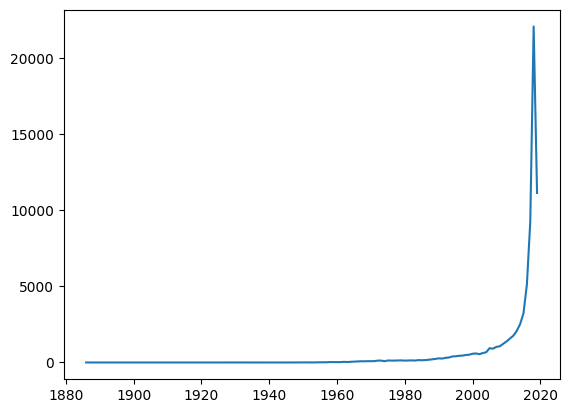

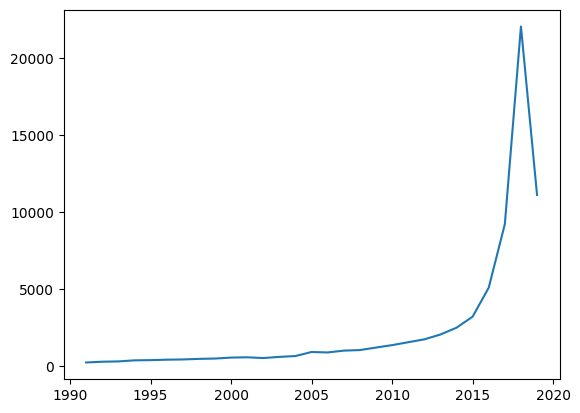

In [512]:
import matplotlib.pyplot as plt
# yearly_releases.reset_index(inplace=True)
year = yearly_releases['year']
releases = yearly_releases['releases']

fig, ax = plt.subplots()
ax.plot(year, releases)

fig, ax = plt.subplots()
post90 = yearly_releases[yearly_releases.year > 1990]
ax.plot(post90['year'], post90['releases']) # Large spike in 2018 with a next-year decline -- COVID?